<a href="https://colab.research.google.com/github/NilmaraSalgado/MachineLearningNil/blob/ML_Supervisionado/SimplesRegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TREINAMENTO REGRESSÃO LINEAR SIMPLES**
Nilmara Salgado

## **1 Definição do Objetivo da Análise**

**Realizar estudo sobre regressão linear simples e sua aplicação utilizando a biblioteca scikit-learn, com exemplo prático**

### 1.1 Entender o problema

* Como problema-teste vamos realizar a predição de preço de vendas de imoveis com base no ano que foram construídos; 
* Importante destacar, que apesar de existe N variáveis para essa análise, estamos tratando aqui de uma regressão simples. Por isso, será utilizado somente 1 variável independente.
* Na função da regressão linear  o Y (Dependente) será o preço da casa que queremos prever e o X (independente) será o tempo de construção do imóvel. Observe que será necessário incluir outras variaveis para análise.



### 1.2 Coletar os dados

* Arquivo utilizado: dadosImoveis.csv
  - DATA: data do cadastro
  - PRICE: valor do imóvel
  - BEDROOMS: quantidade de quartos
  - BATHROOMS: quantidade de banheiros
  - YR_BUILT: ano que o imóvel foi construído
  - YR_RENOVATED: ano que o imóvel passou por reforma
  - STREET: endereço
  - CITY: cidade
  - STATEZIP:estado 
  - COUNTRY:país

## **2 Carregamento dos dados no ambiente de análise**

###2.1 Leitura de Arquivos

In [ ]:
#realizar importações de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
#ler o arquivo de dados, tipo CSV.
df_imovel =  pd.read_csv('/content/dadosImoveis.csv')

###2.2 Visualização de DataFrames

In [ ]:
#identificar quantidade de linhas e colunas dos dados
df_imovel.shape

(2999, 10)

In [ ]:
#visualizar informações das colunas
df_imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2999 non-null   object 
 1   price         2999 non-null   float64
 2   bedrooms      2999 non-null   float64
 3   bathrooms     2999 non-null   float64
 4   yr_built      2999 non-null   int64  
 5   yr_renovated  2999 non-null   int64  
 6   street        2999 non-null   object 
 7   city          2999 non-null   object 
 8   statezip      2999 non-null   object 
 9   country       2999 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 234.4+ KB


In [ ]:
#visualizar base
df_imovel.head(10)

,date,price,bedrooms,bathrooms,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-04 00:00:00,628000.0,4.0,2.00,1900,2005,205-206 Euclid Ave,Seattle,WA 98122,USA
1,2014-05-07 00:00:00,526000.0,2.0,2.00,1900,1971,3845 Whitman Ave N,Seattle,WA 98103,USA
2,2014-05-08 00:00:00,712000.0,3.0,1.00,1900,1971,3612 Interlake Ave N,Seattle,WA 98103,USA
3,2014-05-16 00:00:00,490000.0,3.0,2.00,1900,2003,1746 NW 60th St,Seattle,WA 98107,USA
4,2014-05-20 00:00:00,452000.0,4.0,1.00,1900,2005,1106 N 80th St,Seattle,WA 98103,USA
5,2014-05-28 00:00:00,1400000.0,4.0,3.25,1900,2014,3115 S Norman St,Seattle,WA 98144,USA
6,2014-05-29 00:00:00,550000.0,5.0,2.00,1900,1955,10515 Ashworth Ave N,Seattle,WA 98133,USA
7,2014-05-30 00:00:00,425000.0,3.0,1.75,1900,1971,927 N 79th St,Seattle,WA 98103,USA
8,2014-05-30 00:00:00,240000.0,3.0,2.00,1900,1971,527 S Donovan St,Seattle,WA 98108,USA
9,2014-06-05 00:00:00,440000.0,3.0,1.00,1900,2005,6057-6061 50th Ave SW,Seattle,WA 98136,USA


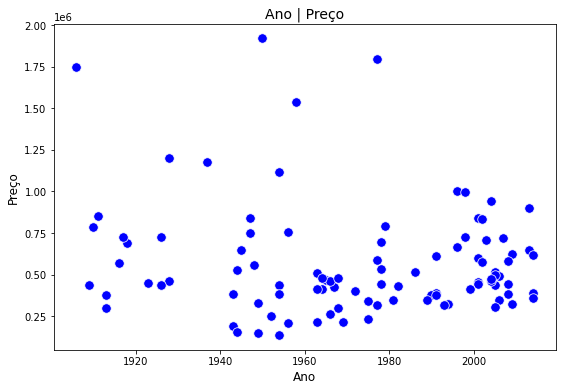

In [ ]:
# Exemplificando a dispersão dos dados através através do gráfico de dispersão Relação Ano | Preço do imóvel com amostra de 100 elementos
df_imovel_amostra = df_imovel.sample(n=100)
plt.figure(figsize=(9,6))
amostra = sns.scatterplot(x='yr_built', y='price', data=df_imovel_amostra , color='blue', s=90)
amostra.set_xlabel('Ano', fontsize=12)
amostra.set_ylabel('Preço', fontsize=12)
amostra.set_title('Ano | Preço', fontsize=14)
plt.show()

In [ ]:
#correlação (se a correlação chegar próximo de 1 então as variáveis tem forte correlação. Mas no nosso exemplo, observem que isso não acontece)
Correlacao =  np.corrcoef(df_imovel_amostra.yr_built,df_imovel_amostra.price)
Correlacao


array([[ 1.       , -0.1288162],
       [-0.1288162,  1.       ]])

In [ ]:
df_imovel_amostra['yr_built'].shape

(100,)

In [ ]:
df_imovel_amostra['price'].shape

(100,)

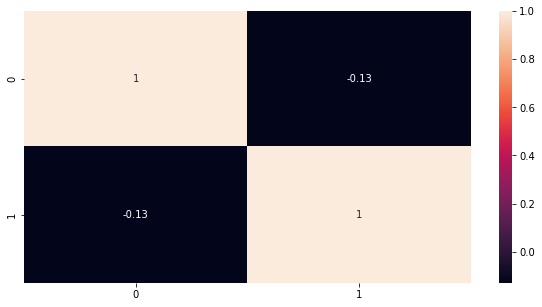

In [ ]:
#visualizando essa correlação (inexistente) em gráfico com seus valores
plt.figure(figsize=(10,5))
sns.heatmap(Correlacao,annot=True)

### 2.3 Tratamento de Dados

In [ ]:
#verificar quantos valores nulos por colunas.
df_imovel.isna().sum()

date            0
price           0
bedrooms        0
bathrooms       0
yr_built        0
yr_renovated    0
street          0
city            0
statezip        0
country         0
dtype: int64

In [ ]:
# usando o datetime para formatar a coluna 'date'
df_imovel['date'] = pd.to_datetime(df_imovel['date'])
df_imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2999 non-null   datetime64[ns]
 1   price         2999 non-null   float64       
 2   bedrooms      2999 non-null   float64       
 3   bathrooms     2999 non-null   float64       
 4   yr_built      2999 non-null   int64         
 5   yr_renovated  2999 non-null   int64         
 6   street        2999 non-null   object        
 7   city          2999 non-null   object        
 8   statezip      2999 non-null   object        
 9   country       2999 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 234.4+ KB


In [ ]:
#deletando colunas 'date','yr_renovated','street', 'city','statezip','country', pois a análise será com base no ano da construção do imóvel
df_imovel_predicao = df_imovel.drop(['date', 'bedrooms','bathrooms','yr_renovated','street', 'city','statezip','country'], axis = 1)
df_imovel_predicao.head(10)


,price,yr_built
0,628000.0,1900
1,526000.0,1900
2,712000.0,1900
3,490000.0,1900
4,452000.0,1900
5,1400000.0,1900
6,550000.0,1900
7,425000.0,1900
8,240000.0,1900
9,440000.0,1900


In [ ]:
#converter os dados em um formato de matriz para passar os dados para o modelo
eixo_x_indp = df_imovel_predicao['yr_built'].values.reshape(-1,1)
eixo_y_dep = df_imovel_predicao['price'].values.reshape(-1,1)


In [ ]:
#passar os dados para modelo
eixo_x_indp_2 = df_imovel_predicao['yr_built']
eixo_y_dep_2 = df_imovel_predicao['price']

## **3 Análise dos Dados**

In [ ]:
df_imovel_predicao.head(10)

,price,yr_built
0,628000.0,1900
1,526000.0,1900
2,712000.0,1900
3,490000.0,1900
4,452000.0,1900
5,1400000.0,1900
6,550000.0,1900
7,425000.0,1900
8,240000.0,1900
9,440000.0,1900


In [ ]:
#fazer as previsoes (train), e o teste é para verificar se fez correto ou não (test). Definindo 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(eixo_x_indp, eixo_y_dep, test_size=0.20)


In [ ]:
print(len (X_train), len( y_train))

2399 2399


In [ ]:
print(len (X_test), len( y_test))

600 600


In [ ]:
#chamando a função da regressão linear e usar a função fit para aplicar os cálculos estatísticos para treinar o modelo. Aqui o modelo vai aprender
Modelo_Regressao = LinearRegression()
Modelo_Regressao.fit(X_train, y_train)

LinearRegression()

In [ ]:
#calcular o quanto o modelo se aproximou da correlação.
Modelo_Regressao.score(X_train, y_train)

0.00012038912825018677

## **4 Visualização do Resultado**

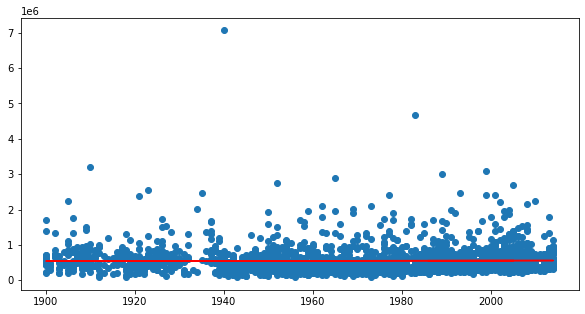

In [ ]:
#chamando o predict para realizar as previsões.
plt.figure(figsize=(10,5))
plt.scatter(X_train,y_train)
plt.plot(X_test, Modelo_Regressao.predict(X_test), color = 'red');

## **Referências**

- Base de dados. https://www.kaggle.com/shree1992/housedata
- Exemplo do código. https://www.kaggle.com/shsrivas/salary-prediction-using-simple-linear-; https://www.youtube.com/watch?v=MCK4uSKTVEM&list=PLLWTDkRZXQa9ilj1HmPOtlzxs6Q8HQHPi&index=11